In [ ]:
## NLP with Machine Learning
# Using Restaurant Reviews to predict if user happy or not

In [47]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re, nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Import Dataset (https://www.kaggle.com/vigneshwarsofficial/reviews)
from google.colab import files
#uploaded = files.upload()
!ls

Restaurant_Reviews.tsv	sample_data


In [6]:
df = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
# High Level Analysis
rows, columns = df.shape
nulls = df.isnull().sum()
print('Rows:',rows,'Columns:',columns)
print('Null Count:',nulls)
print(df['Liked'].value_counts())

Rows: 1000 Columns: 2
Null Count: Review    0
Liked     0
dtype: int64
1    500
0    500
Name: Liked, dtype: int64


In [16]:
# Text PreProcessing
corpus = []

df['Review'] = df['Review'].map(lambda x: re.sub('[,\.?!]','',x))
for i in range(0,1000):
  reviews = re.sub('[^a-zA-Z]',' ',df['Review'][i])
  reviews = reviews.lower().split()
  stemming = PorterStemmer()
  reviews = [stemming.stem(word) for word in reviews 
             if not word in set(stopwords.words('english'))]
  reviews = ' '.join(reviews)
  corpus.append(reviews)

print(corpus)

['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberrymmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place worth time let alon vega', 'like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'rightth red velvet cakeohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could happier', 'seem like go

In [18]:
# Create Bag of Words model

# CountVectorizer tokenises data by grouping by word in a 'bag'
# max_features: Each word is column so limit to 1500
countVec = CountVectorizer(max_features=1500)

# Fit bag (X) and bring in Liked column (y)
X = countVec.fit_transform(corpus).toarray()
y = df.iloc[:,1].values

In [27]:
# Split data into training and testing datasets 
# random_state: keep output the same with each run
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=0)

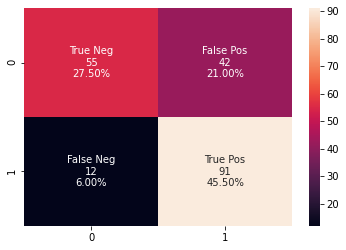

In [53]:
# Machine Learning with Naive Bayes
classify = GaussianNB()
classify.fit(X_train,y_train)
nb_predict = classify.predict(X_test)
nb_matrix = confusion_matrix(y_test,nb_predict)

labels  = ['True Neg','False Pos','False Neg','True Pos']
counts = ['{0:0.0f}'.format(value) for value in
                nb_matrix.flatten()]
percentages = ['{0:.2%}'.format(value) for value in
                     nb_matrix.flatten()/np.sum(nb_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(labels,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(nb_matrix, annot=labels, fmt='')


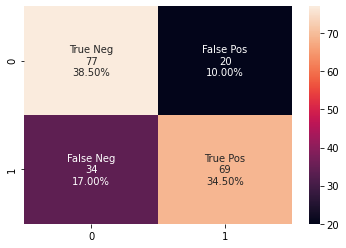

In [55]:
# Machine Learning with Decision Tree
classify = DecisionTreeClassifier(criterion='entropy',random_state=0)
classify.fit(X_train,y_train)
dc_predict = classify.predict(X_test)
dc_matrix = confusion_matrix(y_test,dc_predict)

labels  = ['True Neg','False Pos','False Neg','True Pos']
counts = ['{0:0.0f}'.format(value) for value in
                dc_matrix.flatten()]
percentages = ['{0:.2%}'.format(value) for value in
                     dc_matrix.flatten()/np.sum(dc_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(labels,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(dc_matrix, annot=labels, fmt='')

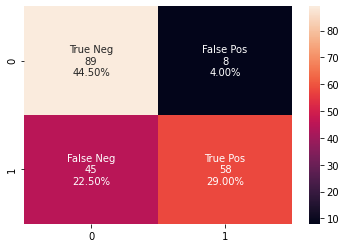

In [59]:
# Machine Learning with Random Forest
classify = RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=0)
classify.fit(X_train,y_train)
rf_predict = classify.predict(X_test)
rf_matrix = confusion_matrix(y_test,rf_predict)

labels  = ['True Neg','False Pos','False Neg','True Pos']
counts = ['{0:0.0f}'.format(value) for value in
                rf_matrix.flatten()]
percentages = ['{0:.2%}'.format(value) for value in
                     rf_matrix.flatten()/np.sum(rf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(labels,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rf_matrix, annot=labels, fmt='')

In [67]:
# Accuracy metrics
print("Naive Bayes Accuracy:",metrics.accuracy_score(y_test,nb_predict))
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test,dc_predict))
print("Random Forest Accuracy:",metrics.accuracy_score(y_test,rf_predict))

Naive Bayes Accuracy: 0.73
Decision Tree Accuracy: 0.73
Random Forest Accuracy: 0.735
